In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
successful_df1 = pd.read_csv("D:/Python/Machine Learning/Research/10%Success_UEP_C042618A_198_DCH20_050318-01-069 (1).csv")
successful_df2 = pd.read_csv("D:/Python/Machine Learning/Research/20%Success_10A2_UEP_C072318A_079_STD_HorL_V_073018-01-050.csv")
successful_df3 = pd.read_csv("D:/Python/Machine Learning/Research/30%Success_UEP_C071018A_084_NonSlit_A_30DoD_072418_091718-01-103 (1).csv")
unsuccessful_df1 = pd.read_csv("D:/Python/Machine Learning/Research/10%Fade_UEP_C120518A_004_6_2_2_DCH20_40_121818-01-097 (1).csv")
unsuccessful_df2 = pd.read_csv("D:/Python/Machine Learning/Research/20%Fade_10A_UEP_C082718A_152_KoH25_101818-01-024.csv")
unsuccessful_df3 = pd.read_csv("D:/Python/Machine Learning/Research/30%Fade_10A_UEP_C071018A_091_NonSlit_A_C_30DoD_072418-01-085.csv")

In [3]:
merged_df = pd.concat([successful_df1.iloc[:10, :], successful_df2.iloc[:10, :], successful_df3.iloc[:10, :], unsuccessful_df1.iloc[:10, :], unsuccessful_df2.iloc[:10, :], unsuccessful_df3.iloc[:10, :]])
# merged_df = pd.concat([successful_df3.iloc[:10, :], unsuccessful_df3.iloc[:10, :]])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

merged_df.replace('None', np.nan, inplace=True)

display(merged_df)

,Cycle Number,Charge Capacity (Ah),Discharge Capacity (Ah),Minimum Test Net Capacity (Ah),Maximum Test Net Capacity (Ah),Maximum Cumulative Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),Minimum Test Net Energy (Wh),Maximum Test Net Energy (Wh),Maximum Cumulative Energy (Wh),Coulombic Efficiency,Energy Efficiency,Voltage Efficiency,Minimum Potential (V),Maximum Potential (V),Mean Charge Potential (time-weighted) (V),Mean Discharge Potential (time-weighted) (V),Open Circuit Potential - Charge (V),Open Circuit Potential - Discharge (V),Relaxation Potential - Charge (V),Relaxation Potential - Discharge (V),Constant Voltage Charge Time (s),Other Charge Time (s),Total Charge Time (s),Constant Voltage Discharge Time (s),Other Discharge Time (s),Total Discharge Time (s),Rest Time (s),Other Cycle Time (s),Total Cycle Time (s),Maximum Charge Power (W),Maximum Discharge Power (W),Mean Charge Power (time-weighted) (W),Mean Discharge Power (time-weighted) (W),Internal Resistance End of Charge (Ω),Internal Resistance End of Discharge (Ω),Maximum Discharge Current (A),Maximum Charge Current (A),Minimum Discharge Current (A),Minimum Charge Current (A),Mean Discharge Current (time-weighted) (A),Mean Charge Current (time-weighted) (A),Mean Discharge Potential (capacity-weighted) (V),Mean Charge Potential (capacity-weighted) (V),Cycle Start Time (s),Cycle End Time (s),Cycle Start Timestamp,Cycle End Timestamp,Initial Discharge Potential (V),Initial Charge Potential (V),Final Discharge Potential (V),Final Charge Potential (V),Internal Resistance Start of Charge (Ω),Internal Resistance Start of Discharge (Ω),Minimum Charge Power (W),Minimum Discharge Power (W),Cycle Net Capacity (Ah),Cycle Net Energy (Wh),Constant Voltage Charge Capacity (Ah),Constant Voltage Charge Energy (Wh),Other Charge Capacity (Ah),Other Charge Energy (Wh),Cumulative Charge Capacity (Ah),Cumulative Charge Energy (Wh),Cumulative Discharge Capacity (Ah),Cumulative Discharge Energy (Wh),A. Batch Nbr,Cell Assembly Date,Cell Assembly Notes,Cell Assembly Operator,C. Batch Nbr,Cell C. Mass _g_,Cell Number,Separator Composition,Cell Dry weight _g_,Electrolyte Formulation,electrolyte _g_,Electrolyte _ml_,Fresh Imp Date,Fresh Imp Pass_Fail_Warn,Fresh Impedance _m?_,Lid seal,Fresh OCV _V_,Fresh OCV Pass_Fail,Electrolyte fill Operator,Cell Wet Weight _g_,Electrolyte Fill Notes,_1_wk_imp__m?_,_1wk_OCV__V_,Wk 1 Imp Pass_Fail_Warn,Wk 1 OCV_Pass_fail_warn_,_2_wk_imp__m?_,_2_wk_OCV__V_,_2_wk_Imp_Pass_Fail_Warn,_2_wk_OCV_Pass_fail_warn_,_3_wk_imp__m?_,_3wk_OCV__V_,_4_wk_OCV,_4_wk_Imp_m?_,Dismantle Anode Color,Dismantle Anode Dendrites Bottom of stack,Dismantle Cathode Color,Dismantle Cathode Precipitate,Dismantle Cathode Texture,Dismantle Cell diameter_middle,Dismantle Cell Swollen,Dismantle Cellophane Color,Dismantle Clear sign of Hard short,Dismantle Color of dendrites Bottom of stack,Dismantle Color of Dendrites Sides of stack,Dismantle Color of dendrites Top of Stack,Dismantle Current Collector Color _ Anode,Dismantle Dendrite Distribution,Dismantle Operator,Dismantle Electrolyte Color,Dismantle Lid Leaks,Dismantle Notes,Dismantle OCV,Dismantle Pellon Color,Dismantle Pellon Precipitate,Dismantle Quantity of Electrolyte,Dismantle Dendrites Sides of Stack,Dismantle spin stop in place,Dismantle Tab Color _ Anode,Dismantle Tab_to_mesh Weld Check,Dismantle Tab_to_terminal Weld Check,Dismantle Terminal gasket leaks,Dismantle Dendrites Top of Stack,UEP cell ID,Cell A. Mass g,Dismantle Image 1,Dismantle Image 2,Dismantle Image 3,Dismantle Image 4,Dismantle Image 5,Dismantle Image 6,Dismantle Image 7,Dismantle Image 8,Dismantle Image 9,Dismantle Image 10,Dismantle Image 11,Dismantle Image 12,Cell Performance Data,Cell Assembly Can diameter_middle,Jelly roll OD in,Theo Void Volume,Can ID in,Active Area sqin,Cathode Loading_minus CC,Capacity,Anode Tabs Aligned,Cathode Tabs Aligned,Tape Brand Make,Heat Seal,Average Fresh OCV,Average Fresh Imp,Cell Dry weight _g_ Average,Cell Wet Weight _g_ A

In [4]:
imputer = SimpleImputer(missing_values = np.nan, strategy = "constant", fill_value = 0)
imputed_df = imputer.fit_transform(merged_df.iloc[:, :])
imputed_df = pd.DataFrame(imputed_df, columns = merged_df.columns)
display(imputed_df)

,Cycle Number,Charge Capacity (Ah),Discharge Capacity (Ah),Minimum Test Net Capacity (Ah),Maximum Test Net Capacity (Ah),Maximum Cumulative Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),Minimum Test Net Energy (Wh),Maximum Test Net Energy (Wh),Maximum Cumulative Energy (Wh),Coulombic Efficiency,Energy Efficiency,Voltage Efficiency,Minimum Potential (V),Maximum Potential (V),Mean Charge Potential (time-weighted) (V),Mean Discharge Potential (time-weighted) (V),Open Circuit Potential - Charge (V),Open Circuit Potential - Discharge (V),Relaxation Potential - Charge (V),Relaxation Potential - Discharge (V),Constant Voltage Charge Time (s),Other Charge Time (s),Total Charge Time (s),Constant Voltage Discharge Time (s),Other Discharge Time (s),Total Discharge Time (s),Rest Time (s),Other Cycle Time (s),Total Cycle Time (s),Maximum Charge Power (W),Maximum Discharge Power (W),Mean Charge Power (time-weighted) (W),Mean Discharge Power (time-weighted) (W),Internal Resistance End of Charge (Ω),Internal Resistance End of Discharge (Ω),Maximum Discharge Current (A),Maximum Charge Current (A),Minimum Discharge Current (A),Minimum Charge Current (A),Mean Discharge Current (time-weighted) (A),Mean Charge Current (time-weighted) (A),Mean Discharge Potential (capacity-weighted) (V),Mean Charge Potential (capacity-weighted) (V),Cycle Start Time (s),Cycle End Time (s),Cycle Start Timestamp,Cycle End Timestamp,Initial Discharge Potential (V),Initial Charge Potential (V),Final Discharge Potential (V),Final Charge Potential (V),Internal Resistance Start of Charge (Ω),Internal Resistance Start of Discharge (Ω),Minimum Charge Power (W),Minimum Discharge Power (W),Cycle Net Capacity (Ah),Cycle Net Energy (Wh),Constant Voltage Charge Capacity (Ah),Constant Voltage Charge Energy (Wh),Other Charge Capacity (Ah),Other Charge Energy (Wh),Cumulative Charge Capacity (Ah),Cumulative Charge Energy (Wh),Cumulative Discharge Capacity (Ah),Cumulative Discharge Energy (Wh),A. Batch Nbr,Cell Assembly Date,Cell Assembly Notes,Cell Assembly Operator,C. Batch Nbr,Cell C. Mass _g_,Cell Number,Separator Composition,Cell Dry weight _g_,Electrolyte Formulation,electrolyte _g_,Electrolyte _ml_,Fresh Imp Date,Fresh Imp Pass_Fail_Warn,Fresh Impedance _m?_,Lid seal,Fresh OCV _V_,Fresh OCV Pass_Fail,Electrolyte fill Operator,Cell Wet Weight _g_,Electrolyte Fill Notes,_1_wk_imp__m?_,_1wk_OCV__V_,Wk 1 Imp Pass_Fail_Warn,Wk 1 OCV_Pass_fail_warn_,_2_wk_imp__m?_,_2_wk_OCV__V_,_2_wk_Imp_Pass_Fail_Warn,_2_wk_OCV_Pass_fail_warn_,_3_wk_imp__m?_,_3wk_OCV__V_,_4_wk_OCV,_4_wk_Imp_m?_,Dismantle Anode Color,Dismantle Anode Dendrites Bottom of stack,Dismantle Cathode Color,Dismantle Cathode Precipitate,Dismantle Cathode Texture,Dismantle Cell diameter_middle,Dismantle Cell Swollen,Dismantle Cellophane Color,Dismantle Clear sign of Hard short,Dismantle Color of dendrites Bottom of stack,Dismantle Color of Dendrites Sides of stack,Dismantle Color of dendrites Top of Stack,Dismantle Current Collector Color _ Anode,Dismantle Dendrite Distribution,Dismantle Operator,Dismantle Electrolyte Color,Dismantle Lid Leaks,Dismantle Notes,Dismantle OCV,Dismantle Pellon Color,Dismantle Pellon Precipitate,Dismantle Quantity of Electrolyte,Dismantle Dendrites Sides of Stack,Dismantle spin stop in place,Dismantle Tab Color _ Anode,Dismantle Tab_to_mesh Weld Check,Dismantle Tab_to_terminal Weld Check,Dismantle Terminal gasket leaks,Dismantle Dendrites Top of Stack,UEP cell ID,Cell A. Mass g,Dismantle Image 1,Dismantle Image 2,Dismantle Image 3,Dismantle Image 4,Dismantle Image 5,Dismantle Image 6,Dismantle Image 7,Dismantle Image 8,Dismantle Image 9,Dismantle Image 10,Dismantle Image 11,Dismantle Image 12,Cell Performance Data,Cell Assembly Can diameter_middle,Jelly roll OD in,Theo Void Volume,Can ID in,Active Area sqin,Cathode Loading_minus CC,Capacity,Anode Tabs Aligned,Cathode Tabs Aligned,Tape Brand Make,Heat Seal,Average Fresh OCV,Average Fresh Imp,Cell Dry weight _g_ Average,Cell Wet Weight _g_ A

In [5]:
clean_df = imputed_df[['Charge Capacity (Ah)', 'Discharge Capacity (Ah)', 'Minimum Test Net Capacity (Ah)', 'Maximum Test Net Capacity (Ah)', 'Charge Energy (Wh)', 'Discharge Energy (Wh)', 'Minimum Test Net Energy (Wh)', 'Maximum Test Net Energy (Wh)', 'Coulombic Efficiency', 'Energy Efficiency', 'Voltage Efficiency', 'Minimum Potential (V)', 'Maximum Potential (V)', 'Mean Charge Potential (time-weighted) (V)', 'Mean Discharge Potential (time-weighted) (V)', 'Relaxation Potential - Charge (V)', 'Relaxation Potential - Discharge (V)', 'Maximum Charge Power (W)', 'Maximum Discharge Power (W)', 'Mean Charge Power (time-weighted) (W)', 'Mean Discharge Power (time-weighted) (W)', 'Internal Resistance End of Charge (Ω)', 'Internal Resistance End of Discharge (Ω)', 'Maximum Discharge Current (A)', 'Maximum Charge Current (A)', 'Minimum Discharge Current (A)', 'Minimum Charge Current (A)', 'Mean Discharge Current (time-weighted) (A)', 'Mean Charge Current (time-weighted) (A)', 'Mean Discharge Potential (capacity-weighted) (V)', 'Mean Charge Potential (capacity-weighted) (V)', 'Initial Discharge Potential (V)', 'Initial Charge Potential (V)', 'Final Discharge Potential (V)', 'Final Charge Potential (V)', 'Internal Resistance Start of Charge (Ω)', 'Internal Resistance Start of Discharge (Ω)', 'Minimum Charge Power (W)', 'Minimum Discharge Power (W)', 'Cycle Net Capacity (Ah)', 'Cycle Net Energy (Wh)']]
display(clean_df) # without manufacturing data for now
clean_df.info()
clean_df = clean_df.convert_objects(convert_numeric=True)
clean_df.info()

,Charge Capacity (Ah),Discharge Capacity (Ah),Minimum Test Net Capacity (Ah),Maximum Test Net Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),Minimum Test Net Energy (Wh),Maximum Test Net Energy (Wh),Coulombic Efficiency,Energy Efficiency,Voltage Efficiency,Minimum Potential (V),Maximum Potential (V),Mean Charge Potential (time-weighted) (V),Mean Discharge Potential (time-weighted) (V),Relaxation Potential - Charge (V),Relaxation Potential - Discharge (V),Maximum Charge Power (W),Maximum Discharge Power (W),Mean Charge Power (time-weighted) (W),Mean Discharge Power (time-weighted) (W),Internal Resistance End of Charge (Ω),Internal Resistance End of Discharge (Ω),Maximum Discharge Current (A),Maximum Charge Current (A),Minimum Discharge Current (A),Minimum Charge Current (A),Mean Discharge Current (time-weighted) (A),Mean Charge Current (time-weighted) (A),Mean Discharge Potential (capacity-weighted) (V),Mean Charge Potential (capacity-weighted) (V),Initial Discharge Potential (V),Initial Charge Potential (V),Final Discharge Potential (V),Final Charge Potential (V),Internal Resistance Start of Charge (Ω),Internal Resistance Start of Discharge (Ω),Minimum Charge Power (W),Minimum Discharge Power (W),Cycle Net Capacity (Ah),Cycle Net Energy (Wh)
0,0,20.0002,0,20.0002,0,26.2885,0,26.2885,0,0,0,1.26893,1.50391,0,1.31430284,0,1.371506095,0,-14.26587604,0,-13.14610498,0,0.010254689,-10.00316238,0,-10.00170612,0,-10.00234386,0,1.314291317,0,1.4262923,0,1.26893425,0,0,0.007759776,0,-12.6924308,20.0002,26.2885
1,21.0002,20.0002,-0.999996,20.0002,33.8447,27.6996,-7.55615,26.2885,0.952384939,0.818434148,0.859352259,1.30668,1.73249,1.612563416,1.3847915,1.650002599,1.398899198,17.33667921,-15.57797196,16.13646426,-13.85168391,0.008242743,0.009219425,-10.00389004,10.00718498,-10.00134182,10.00572872,-10.00273472,10.00671364,1.384788197,1.612565751,1.557474732,1.502688646,1.306675792,1.732486248,0.008365321,0.006664279,15.03549495,-13.0704141,-0.999924,-6.14504
2,21.0003,20.0006,-2.00004,19.0002,34.2394,27.8733,-14.0959,20.1435,0.952394586,0.814070688,0.854761986,1.3082,1.79366,1.631568371,1.393429867,1.691396594,1.401638508,17.95018015,-15.84282757,16.32689585,-13.93810344,0.010219037,0.009311377,-10.00352573,10.00754833,-10.00207043,10.00609303,-10.00273309,10.00687201,1.393427962,1.631570059,1.583954811,1.513950229,1.308502078,1.793664098,0.008486383,0.00712072,15.14927692,-13.08563662,-0.999727,-6.3661
3,21,20.0003,-2.9995,18.0005,34.7988,27.9536,-21.0215,13.7774,0.952394043,0.803292422,0.84344545,1.30668,1.91145,1.658697714,1.397444306,1.750443935,1.402855992,19.12688546,-16.08332726,16.59790857,-13.97836931,0.016090662,0.00961533,-10.00389004,10.00718498,-10.00170612,10.00609303,-10.00280472,10.00658964,1.397443428,1.658700099,1.607999802,1.516080737,1.306675792,1.911454439,0.008577938,0.008064079,15.17004489,-13.0704141,-0.999726,-6.8452
4,19.9976,20,-2.99677,17.0033,33.4151,27.8477,-26.4829,6.93219,1.000123899,0.83338799,0.833284747,1.30089,2.00003,1.672996011,1.392173898,1.755009413,1.400421023,20.01316802,-16.020563,16.74079672,-13.9249352,0.024485801,0.009950398,-10.00316238,10.00682068,-10.00134182,10.00572872,-10.00228556,10.00647787,1.392173967,1.67299823,1.601608157,1.519124508,1.30089283,2.000025511,0.008759818,0.00836776,15.20160654,-13.0116217,0.00247767,-5.56735
5,19.1088,20,-2.10548,17.8945,31.5986,27.6997,-30.2338,1.36484,1.046641608,0.876610899,0.837546389,1.29359,2.00003,1.655772799,1.384773437,1.722746491,1.395551205,20.01389664,-15.84702441,16.56844312,-13.85119089,0.027709003,0.010194206,-10.00316238,10.00718498,-10.00170612,10.00609303,-10.0024948,10.00647096,1.384772204,1.655775273,1.584259152,1.517907023,1.293588042,2.000025511,0.008851714,0.008093918,15.18831888,-12.9385587,0.891263,-3.89893
6,19.6379,20.0003,-1.74341,18.2568,32.3557,27.6714,-34.8898,-2.53409,1.018449261,0.855224919,0.839732476,1.29146,2.00003,1.649707068,1.383348815,1.712702274,1.394029379,20.01316802,-15.80382553,16.50808396,-13.8366109

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 41 columns):
Charge Capacity (Ah)                                60 non-null object
Discharge Capacity (Ah)                             60 non-null object
Minimum Test Net Capacity (Ah)                      60 non-null object
Maximum Test Net Capacity (Ah)                      60 non-null object
Charge Energy (Wh)                                  60 non-null object
Discharge Energy (Wh)                               60 non-null object
Minimum Test Net Energy (Wh)                        60 non-null object
Maximum Test Net Energy (Wh)                        60 non-null object
Coulombic Efficiency                                60 non-null object
Energy Efficiency                                   60 non-null object
Voltage Efficiency                                  60 non-null object
Minimum Potential (V)                               60 non-null object
Maximum Potential (V)                        

c:\users\raf\pycharmprojects\research\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [6]:
# df_stf = StandardScaler().fit_transform(clean_df)
# PCA_df = pd.DataFrame(df_stf, columns = clean_df.columns)
# display(PCA_df)
# len(PCA_df.columns)

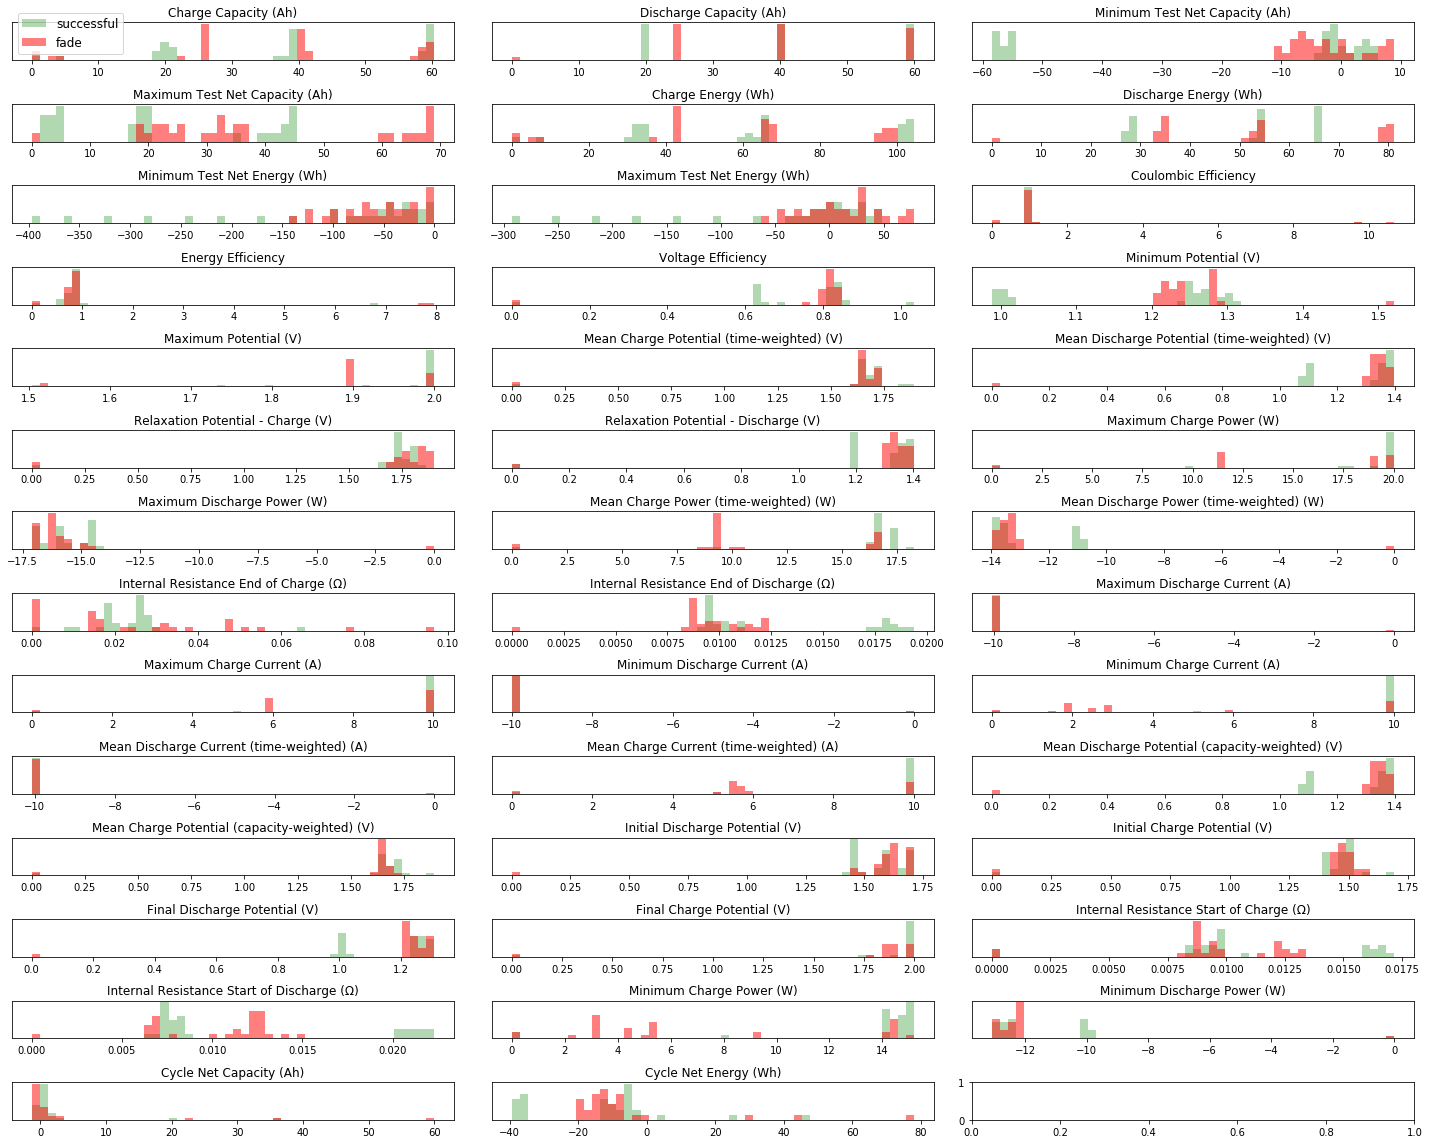

In [7]:
fig, axes = plt.subplots(14, 3, figsize = (20, 16))
ax = axes.ravel()

for i in range(41):
    _, bins = np.histogram(clean_df.iloc[:, i], bins = 50)
    ax[i].hist(clean_df.iloc[:30, i], bins = bins, color = 'g', alpha = 0.3)
    ax[i].hist(clean_df.iloc[30:, i], bins = bins, color = 'r', alpha = 0.5)
    ax[i].set_title(clean_df.columns[i], fontsize = 12)
    ax[i].axes.get_xaxis().set_visible(True)
    ax[i].set_yticks(())
    
ax[0].legend(['successful', 'fade'], loc = 'best', fontsize = 12)
plt.tight_layout()
plt.show()